In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
ds = pd.read_csv('F:/cdac/ml/ML-algo/8-decision-tree/winequality-dataset/winequality_red.csv')
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
x = ds.iloc[ :, :-1]
Y = ds.iloc[ :, -1]

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, stratify=Y)

In [9]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(150, 100, 45), activation='relu', max_iter=300, solver='adam')
model.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 100, 45), max_iter=300)

In [10]:
ypred = model.predict(x_test)
ypred

array([6, 5, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 7, 6,
       6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5,
       6, 7, 5, 6, 6, 5, 6, 5, 6, 7, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6,
       6, 6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 4, 5, 6, 7, 6, 5, 7, 6,
       7, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 6, 5, 6,
       5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 6, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 5, 5, 6, 6, 6, 4, 6, 5, 5,
       5, 6, 5, 5, 5, 6, 7, 6, 7, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 7, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       5, 6, 6, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5, 7, 6, 4, 5, 6,
       6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6,

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, ypred))

0.625


In [12]:
confusion_matrix(y_test, ypred)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   1,   9,   3,   0,   0],
       [  0,   1, 109,  60,   0,   0],
       [  0,   2,  27, 118,  13,   0],
       [  0,   0,   1,  27,  22,   0],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

In [15]:
clf = MLPClassifier()
m = [100,200,250]
s = ['sgd', 'adam']
a1=['tanh','logistic','relu']
a2=[0.0001,0.05,0.10]
param_grid = {'max_iter':m, 'solver':s, 'activation':a1,'alpha': a2}
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x_train, y_train)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'logistic', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'max_iter': [100, 200, 250],
                         'solver': ['sgd', 'adam']})

In [16]:
grid.best_params_

{'activation': 'relu', 'alpha': 0.05, 'max_iter': 200, 'solver': 'adam'}

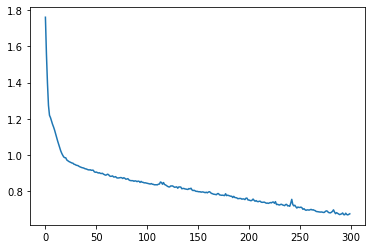

In [21]:
plt.plot(model.loss_curve_)

In [19]:
accuracy_score(y_test, grid.best_estimator_.predict(x_test))

0.605